# Guide
In this notebook we are goint to analise the data using location cluster.

When the dataset 1 is created we aded a column called cluster, clusterlon, clusterlan. All the data is divide in squares of location. (The size of the square is 0.01 using latitude and longitud. Example: on square is build of 4 points 40.485,-3.715 - 40.485,-3.705 - 40.475,-3.715 - 40.475,-3.705 - 40.485,-3.705)

The data used in this notebook is generated from the view V_data_cluster: This view show de number of  trips per hour per square /cluster.
This analysis don`t have satisfactory results, in next notebooks we will see that the reason in a too low number of data becouse is divided in too much clusters.

# Preconfiguration
To execute - First create a service account and save in Google Drive, after change next data

In [1]:
#Modify after MyDrive providing folders and file name
service_account_location = "drive/MyDrive/Ideas/movilidad/vacio-276411-service_account_for_colab.json"

# Imports

In [ ]:
pip install --upgrade 'google-cloud-bigquery[bqstorage,pandas]'

In [3]:
#BIGQUERY IMPORTS
from google.cloud import bigquery #For bigquerycredentials
from google.oauth2 import service_account #For credentials


##Mount access to Drive
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

#Set credentials as global
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]=service_account_location

# Construct a BigQuery client object.
client = bigquery.Client()

Mounted at /content/drive


#Get data from BigQuery - Analize only Thrusday -  pdThursday

The next step takes 11 mintues - Other notebooks have the queries more optimized

In [4]:
query = """ SELECT * FROM `vacio-276411.mainDataset.V_data_cluster` """

dataframe = client.query(query).to_dataframe()

In [5]:
dataframe.head()

,servicio,tipoVehiculo,year,month,day,weekday,hour,clusterId,clusterLatitude,clusterLongitude,numAvailable,numTrips
0,acciona,moto,2022,7,29,Friday,0,288,40.305,-3.725,16,NaN
1,movo,moto,2022,7,29,Friday,0,865,40.435,-3.675,44,NaN
2,emov,coche,2022,8,1,Monday,18,862,40.435,-3.705,16,NaN
3,car2go,coche,2022,8,1,Monday,19,641,40.385,-3.715,4,NaN
4,acciona,moto,2022,7,29,Friday,4,1307,40.535,-3.655,8,NaN


In [6]:
dataframe.groupby('numTrips').count()

,servicio,tipoVehiculo,year,month,day,weekday,hour,clusterId,clusterLatitude,clusterLongitude,numAvailable
numTrips,,,,,,,,,,,
1.0,3038545,3038545,3038545,3038545,3038545,3038545,3038545,3038545,3038545,3038545,3038545
2.0,162226,162226,162226,162226,162226,162226,162226,162226,162226,162226,162226
3.0,18357,18357,18357,18357,18357,18357,18357,18357,18357,18357,18357
4.0,3135,3135,3135,3135,3135,3135,3135,3135,3135,3135,3135
5.0,931,931,931,931,931,931,931,931,931,931,931
6.0,463,463,463,463,463,463,463,463,463,463,463
7.0,158,158,158,158,158,158,158,158,158,158,158
8.0,56,56,56,56,56,56,56,56,56,56,56
9.0,24,24,24,24,24,24,24,24,24,24,24


In [7]:
pdThursday = dataframe[dataframe.weekday == 'Thursday']
pdThursday

,servicio,tipoVehiculo,year,month,day,weekday,hour,clusterId,clusterLatitude,clusterLongitude,numAvailable,numTrips
78,movo,moto,2021,7,8,Thursday,1,10,40.392,-3.726,5,NaN
93,wible,coche,2022,2,3,Thursday,4,73,40.472,-3.736,3,NaN
100,movo,moto,2022,7,14,Thursday,14,10,40.392,-3.726,14,NaN
103,ecooltra,moto,2022,1,6,Thursday,5,16,40.392,-3.666,1,NaN
106,car2go,coche,2021,9,30,Thursday,1,10,40.392,-3.726,21,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
6590320,car2go,coche,2021,4,15,Thursday,4,88,40.482,-3.666,14,NaN
6590325,wible,coche,2022,4,28,Thursday,19,88,40.482,-3.666,3,1.0
6590349,ecooltra,moto,2022,5,19,Thursday,0,88,40.482,-3.666,18,NaN
6590350,acciona,moto,2022,5,19,Thursday,0,88,40.482,-3.666,7,NaN


# Remove NA/0 and prepare data training/test 

## ATTENTION: 
**Some attributes were removed becouse DecisionTreeClassifier dont allow categorical variables**
- servicio
- tipoVehiculo
- weekday

In [8]:
#Remove when there are 0 vehicles availables
pdThursdayClean = pdThursday.drop(pdThursday[ pdThursday.numAvailable == 0 ].index)
pdThursdayClean = pdThursdayClean.dropna(subset=['numAvailable'])
#Fill when there are no trips with 0 instead of NaN
pdThursdayClean['numTrips'] = pdThursdayClean['numTrips'].fillna(0)


#It's importante remove year,month,day because qwe do not need that data
pdThursdayClean = pdThursdayClean.drop(['year', 'month','day','clusterLatitude', 'clusterLongitude'], axis=1)

#Prepare the trainData and the result
pdThursdayNumTrips = pdThursdayClean[['numTrips']]
#pdThursdayInfo = pdThursday[['servicio', 'tipoVehiculo', 'year', 'month', 'day', 'weekday', 'hour', 'clusterId', 'clusterLatitude','clusterLongitude', 'numAvailable']]
pdThursdayInfo = pdThursdayClean[['hour', 'clusterId', 'numAvailable']]



#NOT NECESARY BECOUSE NOW ONLY THURSDAY
#Change days of the week to number 1-Monday
#pdThursdayInfo['weekdayNumber'] = pdThursdayInfo['weekday'].map({'Monday': 1, 'Tuesday': 2, 'Wednesday' : 3, 'Thursday': 4,'Friday' : 5, 'Saturday': 6, 'Sunday' : 7})
#pdThursdayInfo

In [9]:
pdThursdayClean['numTrips']

78         0.0
93         0.0
100        0.0
103        0.0
106        0.0
          ... 
6590320    0.0
6590325    1.0
6590349    0.0
6590350    0.0
6590359    0.0
Name: numTrips, Length: 970465, dtype: float64

In [10]:
pdThursdayClean.groupby(['numTrips']).count()

,servicio,tipoVehiculo,weekday,hour,clusterId,numAvailable
numTrips,,,,,,
0.0,471306,471306,471306,471306,471306,471306
1.0,469482,469482,469482,469482,469482,469482
2.0,25969,25969,25969,25969,25969,25969
3.0,2941,2941,2941,2941,2941,2941
4.0,471,471,471,471,471,471
5.0,164,164,164,164,164,164
6.0,81,81,81,81,81,81
7.0,29,29,29,29,29,29
8.0,9,9,9,9,9,9


# Train a tree

In [11]:
#Brake the data between train and test
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(pdThursdayInfo, pdThursdayNumTrips)

In [12]:
#Train a tree
from sklearn import tree

classifier = tree.DecisionTreeClassifier()
classifier.fit(X_train, Y_train)

DecisionTreeClassifier()

In [13]:
predictions = classifier.predict(X_test)

In [14]:
from sklearn import metrics

predictions_prob = classifier.predict_proba(X_test)[:,1]
predictions_prob = predictions_prob.round(0)

In [15]:
predictions_prob

array([0., 0., 0., ..., 1., 1., 1.])

         hour  clusterId  numAvailable  Real  Prediction  Err
2329431     2         34             3   0.0         0.0  0.0
207297      2        685             4   0.0         0.0  0.0
3039482    12         42             5   0.0         0.0  0.0
6073260    21         79            19   0.0         1.0 -1.0
3215836    13         44             4   1.0         1.0  0.0
...       ...        ...           ...   ...         ...  ...
2360960    14         35             3   0.0         0.0  0.0
1013910    16         13             9   1.0         1.0  0.0
6145395    16         80            11   1.0         1.0  0.0
3585077     9         46           100   1.0         1.0  0.0
5271730    15         68             3   0.0         1.0 -1.0

[242617 rows x 6 columns]


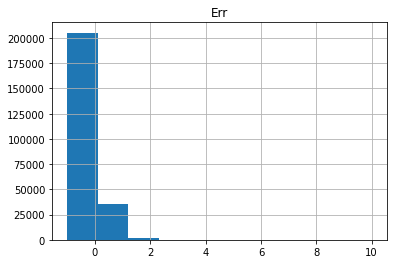

In [16]:
import pandas as pd
#Merge two dataframes
result = X_test.copy()
result['Real'] = Y_test
result['Prediction'] =predictions_prob


#Estimar error
result['Err'] = result['Real'] - result['Prediction'] 

print(result)

histogram = result.hist(column ='Err')

In [17]:
#Calcular el error en funcion de real
result.groupby(by=['Real']).mean()[['numAvailable','Prediction']]

,numAvailable,Prediction
Real,,
0.0,11.139210,0.209929
1.0,23.285617,0.744787
2.0,39.434577,0.904311
3.0,50.906250,0.917969
4.0,57.062500,0.848214
5.0,91.000000,0.800000
6.0,67.521739,0.652174
7.0,111.333333,0.777778
8.0,146.000000,1.000000


In [18]:
 #Calcular el error en funcion de real
result.groupby(by=['Real']).count() #El problema viene de que hay toneladas de datos de 1 y no hay casi del resto 

,hour,clusterId,numAvailable,Prediction,Err
Real,,,,,
0.0,118059,118059,118059,118059,118059
1.0,117059,117059,117059,117059,117059
2.0,6542,6542,6542,6542,6542
3.0,768,768,768,768,768
4.0,112,112,112,112,112
5.0,40,40,40,40,40
6.0,23,23,23,23,23
7.0,9,9,9,9,9
8.0,1,1,1,1,1


# Train if is going to exist a movement or not

In [19]:
pdThursdayNumTripsYesNo = pdThursdayNumTrips['numTrips'] >0

In [20]:
pdThursdayNumTripsYesNo

78         False
93         False
100        False
103        False
106        False
           ...  
6590320    False
6590325     True
6590349    False
6590350    False
6590359    False
Name: numTrips, Length: 970465, dtype: bool

In [21]:
#Brake the data between train and test
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(pdThursdayInfo, pdThursdayNumTripsYesNo)

In [22]:
#Train a tree
from sklearn import tree

classifier = tree.DecisionTreeClassifier()
classifier.fit(X_train, Y_train)

#Predict
predictions = classifier.predict(X_test)

#Calculate metrics
from sklearn import metrics

predictions_prob = classifier.predict_proba(X_test)[:,1]
predictions_prob = predictions_prob.round(0)
print(predictions_prob)

#Generate dataframe
import pandas as pd
#Merge two dataframes
result = X_test.copy()
result['Real'] = Y_test
result['Prediction'] =predictions_prob


#Estimar error
result['Err'] = result['Real'] - result['Prediction'] 

print(result)

#Calculate error depending on class
result.groupby(by=['Real']).mean()[['numAvailable','Prediction']]

[0. 1. 0. ... 1. 0. 0.]
         hour  clusterId  numAvailable   Real  Prediction  Err
722687     17        729           108  False         0.0  0.0
4959526    17         62            11   True         1.0  0.0
443621     17        862             6  False         0.0  0.0
4484944    18         56             7  False         1.0 -1.0
3806693     8         48            42   True         0.0  1.0
...       ...        ...           ...    ...         ...  ...
1423029     8         22             3   True         0.0  1.0
1851952    12         28           209   True         1.0  0.0
6005571     8         78            38   True         1.0  0.0
1973952    21         29            22   True         0.0  1.0
722390     19         73             1  False         0.0  0.0

[242617 rows x 6 columns]


,numAvailable,Prediction
Real,,
False,11.115088,0.216375
True,24.249111,0.770960


In [24]:
#Visualize the tree
#Takes too much time
#tree.plot_tree(classifier)
"""
import matplotlib.pyplot as plt

plt.figure(figsize = (20,20))
tree.plot_tree(classifier,
              feature_names = X_train.columns.values,
              class_names = ['No', 'Sí'],
              filled = True,
              impurity = False,
              fontsize = 8)
plt.show()
"""

"\nimport matplotlib.pyplot as plt\n\nplt.figure(figsize = (20,20))\ntree.plot_tree(classifier,\n              feature_names = X_train.columns.values,\n              class_names = ['No', 'Sí'],\n              filled = True,\n              impurity = False,\n              fontsize = 8)\nplt.show()\n"

#Mix all the operators
Now i need more data for a specific time so i mix all the operators

In [25]:

pdThursdayAgruped = pdThursdayClean[['tipoVehiculo', 'weekday', 'hour',
       'clusterId','numAvailable','numTrips']]

#Now can filter between coche/patinete/moto

pdThursdayAgrupedCar = pdThursdayAgruped[pdThursdayAgruped['tipoVehiculo'] == 'coche']
pdThursdayAgrupedScooter = pdThursdayAgruped[pdThursdayAgruped['tipoVehiculo'] == 'patinete']
pdThursdayAgrupedMoto = pdThursdayAgruped[pdThursdayAgruped['tipoVehiculo'] == 'moto']

print(pdThursdayAgrupedCar.size)
print(pdThursdayAgrupedScooter.size)
print(pdThursdayAgrupedMoto.size)

2231832
299526
3291432


Continue with moto becouse there are more data

In [26]:
pdThursdayAgrupedMoto

,tipoVehiculo,weekday,hour,clusterId,numAvailable,numTrips
78,moto,Thursday,1,10,5,0.0
100,moto,Thursday,14,10,14,0.0
103,moto,Thursday,5,16,1,0.0
115,moto,Thursday,4,5,4,0.0
123,moto,Thursday,12,3,6,0.0
...,...,...,...,...,...,...
6590299,moto,Thursday,9,88,8,1.0
6590300,moto,Thursday,9,88,8,1.0
6590301,moto,Thursday,9,88,8,1.0
6590349,moto,Thursday,0,88,18,0.0


Now train the model only for availability and moto

In [27]:


#Prepare the trainData and the result
pdThursdayAgrupedMotoNumTrips = pdThursdayAgrupedMoto[['numTrips']]
#pdThursdayAgrupedMotoInfo = pdThursdayAgrupedMoto[['year', 'month', 'day', 'hour', 'clusterId', 'clusterLatitude','clusterLongitude', 'numAvailable']]
pdThursdayAgrupedMotoInfo = pdThursdayAgrupedMoto[['hour', 'clusterId', 'numAvailable']]



#Brake the data between train and test
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(pdThursdayAgrupedMotoInfo, pdThursdayAgrupedMotoNumTrips)

#Train a tree
from sklearn import tree

classifier = tree.DecisionTreeClassifier()
classifier.fit(X_train, Y_train)

#Predict
predictions = classifier.predict(X_test)



In [28]:
pdThursdayAgrupedMoto['numTrips'][0:50]

78     0.0
100    0.0
103    0.0
115    0.0
123    0.0
126    0.0
142    0.0
149    0.0
168    0.0
169    0.0
176    0.0
182    0.0
186    0.0
196    1.0
197    0.0
237    0.0
238    0.0
239    0.0
240    0.0
241    0.0
242    0.0
243    0.0
244    0.0
245    0.0
385    0.0
388    0.0
390    0.0
393    0.0
397    0.0
398    0.0
399    0.0
400    0.0
402    0.0
403    0.0
404    0.0
406    0.0
408    0.0
409    0.0
414    0.0
415    0.0
419    0.0
421    0.0
450    0.0
452    0.0
598    1.0
609    0.0
626    0.0
628    0.0
653    0.0
664    0.0
Name: numTrips, dtype: float64

In [29]:
pdThursdayAgrupedMoto['numTrips'].mean()

0.648325105911348

         hour  clusterId  numAvailable  Real  Prediction  Err
3231648     9         44            33   1.0         1.0  0.0
3344652     8         45            46   1.0         1.0  0.0
4164644    11         53            10   0.0         0.0  0.0
5119068    18         64             1   0.0         0.0  0.0
5579939    14         71            11   1.0         1.0  0.0
...       ...        ...           ...   ...         ...  ...
2575788     1         37            17   0.0         0.0  0.0
1260443     7         20            12   1.0         1.0  0.0
575898      2         10             8   0.0         0.0  0.0
6248465    20         83             1   0.0         0.0  0.0
2933122    13         40            20   1.0         1.0  0.0

[137143 rows x 6 columns]


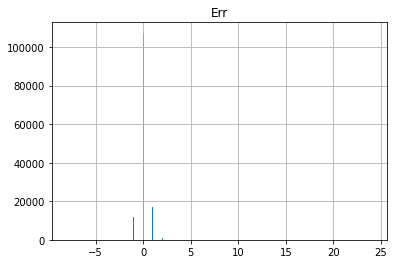

In [30]:
#Analise the prediction
import pandas as pd
#Merge two dataframes
result = X_test.copy()
result['Real'] = Y_test
result['Prediction'] =predictions


#Estimar error
result['Err'] = result['Real'] - result['Prediction'] 

print(result)

histogram = result.hist(column ='Err', bins=400)

In [31]:
#See the prediction
#Calcular el error en funcion de real
result.groupby(by=['Real']).mean()[['numAvailable','Prediction']]

,numAvailable,Prediction
Real,,
0.0,17.768706,0.206604
1.0,33.392215,0.851903
2.0,43.429867,0.956211
3.0,51.359253,0.970451
4.0,62.948718,0.923077
5.0,76.000000,0.782609
6.0,112.045455,1.136364
7.0,103.285714,0.857143
8.0,109.500000,0.750000


         hour  clusterId  numAvailable  Real  Prediction       Err  \
3231648     9         44            33   1.0    0.709310  0.290690   
3344652     8         45            46   1.0    0.777866  0.222134   
4164644    11         53            10   0.0    0.579589 -0.579589   
5119068    18         64             1   0.0    0.568591 -0.568591   
5579939    14         71            11   1.0    0.591110  0.408890   
...       ...        ...           ...   ...         ...       ...   
2575788     1         37            17   0.0    0.560863 -0.560863   
1260443     7         20            12   1.0    0.592478  0.407522   
575898      2         10             8   0.0    0.540563 -0.540563   
6248465    20         83             1   0.0    0.565711 -0.565711   
2933122    13         40            20   1.0    0.666182  0.333818   

         ErrPorcentage  
3231648       0.008809  
3344652       0.004829  
4164644       0.057959  
5119068       0.568591  
5579939       0.037172  
...      

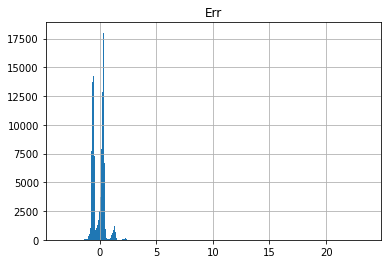

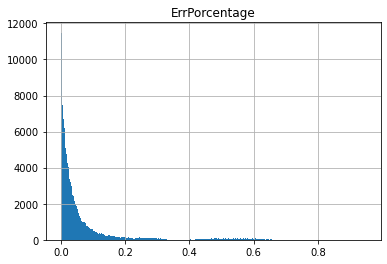

In [32]:
#Now linear regresion
from sklearn.linear_model import LinearRegression 

classifier = LinearRegression()
classifier.fit(X_train, Y_train)

#Predict
predictions = classifier.predict(X_test)

#Analise the prediction
import pandas as pd
#Merge two dataframes
result = X_test.copy()
result['Real'] = Y_test
result['Prediction'] =predictions


#Estimar error
result['Err'] = result['Real'] - result['Prediction'] 
result['ErrPorcentage'] = abs(result['Real'] - result['Prediction']) / result['numAvailable'] 

print(result)

histogram = result.hist(column ='Err', bins=400)

histogram2 = result.hist(column ='ErrPorcentage', bins=400)

In [33]:
result['Real']

3231648    1.0
3344652    1.0
4164644    0.0
5119068    0.0
5579939    1.0
          ... 
2575788    0.0
1260443    1.0
575898     0.0
6248465    0.0
2933122    1.0
Name: Real, Length: 137143, dtype: float64

In [34]:
result.head(-20)

,hour,clusterId,numAvailable,Real,Prediction,Err,ErrPorcentage
3231648,9,44,33,1.0,0.709310,0.290690,0.008809
3344652,8,45,46,1.0,0.777866,0.222134,0.004829
4164644,11,53,10,0.0,0.579589,-0.579589,0.057959
5119068,18,64,1,0.0,0.568591,-0.568591,0.568591
5579939,14,71,11,1.0,0.591110,0.408890,0.037172
...,...,...,...,...,...,...,...
3113183,19,43,18,1.0,0.696686,0.303314,0.016851
3287155,3,44,36,2.0,0.681899,1.318101,0.036614
2794623,11,39,52,1.0,0.841678,0.158322,0.003045
3268965,9,44,52,1.0,0.821894,0.178106,0.003425


In [35]:
#Calcular el error en funcion de real
result.groupby(by=['Real']).mean()[['numAvailable','Prediction']]

,numAvailable,Prediction
Real,,
0.0,17.768706,0.513631
1.0,33.392215,0.736679
2.0,43.429867,0.796791
3.0,51.359253,0.842357
4.0,62.948718,0.903428
5.0,76.000000,0.986895
6.0,112.045455,1.187457
7.0,103.285714,1.161819
8.0,109.500000,1.217463


Score
0.17709183748354995
         hour  clusterId  numAvailable  Real  Prediction       Err  \
3231648     9         44            33   1.0    0.709310  0.290690   
3344652     8         45            46   1.0    0.777866  0.222134   
4164644    11         53            10   0.0    0.579589 -0.579589   
5119068    18         64             1   0.0    0.568591 -0.568591   
5579939    14         71            11   1.0    0.591110  0.408890   
...       ...        ...           ...   ...         ...       ...   
2575788     1         37            17   0.0    0.560863 -0.560863   
1260443     7         20            12   1.0    0.592478  0.407522   
575898      2         10             8   0.0    0.540563 -0.540563   
6248465    20         83             1   0.0    0.565711 -0.565711   
2933122    13         40            20   1.0    0.666182  0.333818   

         ErrPorcentage  
3231648       0.008809  
3344652       0.004829  
4164644       0.057959  
5119068       0.568591  
5579939 

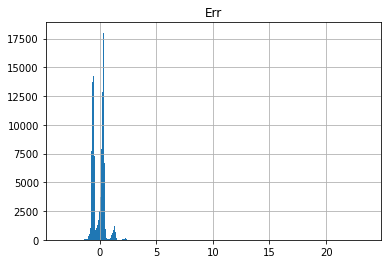

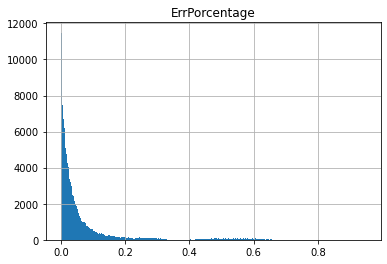

In [36]:
#Ridge Regression
from sklearn.linear_model import Ridge
import numpy as np

rdg = Ridge(alpha = 0.5)

rdg.fit(X_train, Y_train)
print('Score')
print(rdg.score(X_test,Y_test))

#Predict
predictions = classifier.predict(X_test)


#Analise the prediction

#Merge two dataframes
result = X_test.copy()
result['Real'] = Y_test
result['Prediction'] =predictions


#Estimar error
result['Err'] = result['Real'] - result['Prediction'] 
result['ErrPorcentage'] = abs(result['Real'] - result['Prediction']) / result['numAvailable'] 

print(result)

histogram = result.hist(column ='Err', bins=400)

histogram2 = result.hist(column ='ErrPorcentage', bins=400)


In [37]:
#Calcular el error en funcion de real
result.groupby(by=['Real']).mean()[['numAvailable','Prediction']]

,numAvailable,Prediction
Real,,
0.0,17.768706,0.513631
1.0,33.392215,0.736679
2.0,43.429867,0.796791
3.0,51.359253,0.842357
4.0,62.948718,0.903428
5.0,76.000000,0.986895
6.0,112.045455,1.187457
7.0,103.285714,1.161819
8.0,109.500000,1.217463


In [38]:
 #Calcular el error en funcion de real
result.groupby(by=['Real']).count() #El problema viene de que hay toneladas de datos de 0,1 y no hay casi del resto 

,hour,clusterId,numAvailable,Prediction,Err,ErrPorcentage
Real,,,,,,
0.0,55812,55812,55812,55812,55812,55812
1.0,74755,74755,74755,74755,74755,74755
2.0,5732,5732,5732,5732,5732,5732
3.0,643,643,643,643,643,643
4.0,117,117,117,117,117,117
5.0,46,46,46,46,46,46
6.0,22,22,22,22,22,22
7.0,7,7,7,7,7,7
8.0,4,4,4,4,4,4


# Now try with Ensamble Regressors

In [39]:
# evaluate bagging ensemble for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import BaggingRegressor
# define the model
model = BaggingRegressor()
# evaluate the model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train, Y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -0.293 (0.002)


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


         hour  clusterId  numAvailable  Real  Prediction       Err  \
3231648     9         44            33   1.0    1.081905 -0.081905   
3344652     8         45            46   1.0    0.857456  0.142544   
4164644    11         53            10   0.0    0.023077 -0.023077   
5119068    18         64             1   0.0    0.118579 -0.118579   
5579939    14         71            11   1.0    1.188939 -0.188939   
...       ...        ...           ...   ...         ...       ...   
2575788     1         37            17   0.0    0.360952 -0.360952   
1260443     7         20            12   1.0    0.816263  0.183737   
575898      2         10             8   0.0    0.283333 -0.283333   
6248465    20         83             1   0.0    0.000000  0.000000   
2933122    13         40            20   1.0    1.062502 -0.062502   

         ErrPorcentage  
3231648       0.002482  
3344652       0.003099  
4164644       0.002308  
5119068       0.118579  
5579939       0.017176  
...      

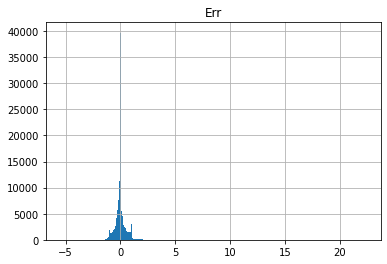

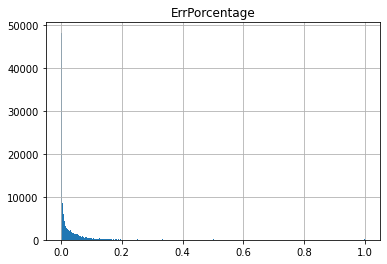

In [40]:

# fit the model on the whole dataset
model.fit(X_train, Y_train)

#Evaluate the prediction
#Predict
predictions = model.predict(X_test)


#Analise the prediction

#Merge two dataframes
result = X_test.copy()
result['Real'] = Y_test
result['Prediction'] =predictions


#Estimar error
result['Err'] = result['Real'] - result['Prediction'] 
result['ErrPorcentage'] = abs(result['Real'] - result['Prediction']) / result['numAvailable'] 

print(result)

histogram = result.hist(column ='Err', bins=400)

histogram2 = result.hist(column ='ErrPorcentage', bins=400)


In [41]:
#Calcular el error en funcion de real
result.groupby(by=['Real']).mean()[['numAvailable','Prediction']]

,numAvailable,Prediction
Real,,
0.0,17.768706,0.275269
1.0,33.392215,0.903085
2.0,43.429867,1.037137
3.0,51.359253,1.089630
4.0,62.948718,1.126160
5.0,76.000000,1.033745
6.0,112.045455,1.333697
7.0,103.285714,1.163868
8.0,109.500000,0.800000


In [42]:
#Merge two dataframes
result = X_test.copy()
result['Real'] = Y_test
result['Prediction'] =predictions.round(0)


#Estimar error
result['Err'] = result['Real'] - result['Prediction'] 
result['ErrPorcentage'] = abs(result['Real'] - result['Prediction']) / result['numAvailable'] 

print(result)

#Calcular el error en funcion de real
result.groupby(by=['Real']).mean()[['numAvailable','Prediction']]


         hour  clusterId  numAvailable  Real  Prediction  Err  ErrPorcentage
3231648     9         44            33   1.0         1.0  0.0            0.0
3344652     8         45            46   1.0         1.0  0.0            0.0
4164644    11         53            10   0.0         0.0  0.0            0.0
5119068    18         64             1   0.0         0.0  0.0            0.0
5579939    14         71            11   1.0         1.0  0.0            0.0
...       ...        ...           ...   ...         ...  ...            ...
2575788     1         37            17   0.0         0.0  0.0            0.0
1260443     7         20            12   1.0         1.0  0.0            0.0
575898      2         10             8   0.0         0.0  0.0            0.0
6248465    20         83             1   0.0         0.0  0.0            0.0
2933122    13         40            20   1.0         1.0  0.0            0.0

[137143 rows x 7 columns]


,numAvailable,Prediction
Real,,
0.0,17.768706,0.236920
1.0,33.392215,0.891633
2.0,43.429867,0.999302
3.0,51.359253,1.035770
4.0,62.948718,1.042735
5.0,76.000000,1.021739
6.0,112.045455,1.272727
7.0,103.285714,1.285714
8.0,109.500000,0.750000


# The same but now only if exist movement or not

In [43]:
pdThursdayNumTripsYesNo = pdThursdayNumTrips['numTrips'] >0

In [44]:
pdThursdayNumTripsYesNo

78         False
93         False
100        False
103        False
106        False
           ...  
6590320    False
6590325     True
6590349    False
6590350    False
6590359    False
Name: numTrips, Length: 970465, dtype: bool

In [45]:
#Brake the data between train and test
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(pdThursdayInfo, pdThursdayNumTripsYesNo)

In [46]:
# evaluate bagging ensemble for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import BaggingRegressor
# define the model
model = BaggingRegressor()
# evaluate the model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train, Y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -0.280 (0.001)


         hour  clusterId  numAvailable   Real  Prediction       Err  \
770562      7        776             8  False    0.000000  0.000000   
2082894    19         30             2  False    0.284431 -0.284431   
2036683     8         29            17   True    0.808333  0.191667   
6103754    22         79             3  False    0.145239 -0.145239   
414340     11        780             4  False    0.000000  0.000000   
...       ...        ...           ...    ...         ...       ...   
5809782    23         75             3  False    0.091327 -0.091327   
1375595    18         21             3  False    0.619874 -0.619874   
5103954     0         63             3  False    0.061136 -0.061136   
2458690     5         36            31   True    0.704524  0.295476   
1798627     3         27            29   True    0.691310  0.308690   

         ErrPorcentage  
770562        0.000000  
2082894       0.142215  
2036683       0.011275  
6103754       0.048413  
414340        0.000000

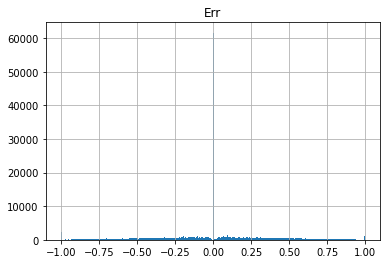

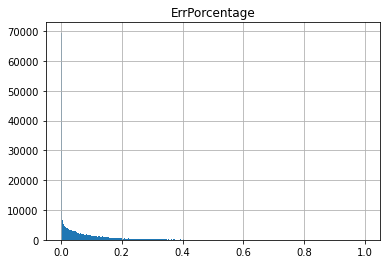

In [47]:

# fit the model on the whole dataset
model.fit(X_train, Y_train)

#Evaluate the prediction
#Predict
predictions = model.predict(X_test)


#Analise the prediction

#Merge two dataframes
result = X_test.copy()
result['Real'] = Y_test
result['Prediction'] =predictions


#Estimar error
result['Err'] = result['Real'] - result['Prediction'] 
result['ErrPorcentage'] = abs(result['Real'] - result['Prediction']) / result['numAvailable'] 

print(result)

histogram = result.hist(column ='Err', bins=400)

histogram2 = result.hist(column ='ErrPorcentage', bins=400)


In [48]:
#Merge two dataframes
result = X_test.copy()
result['Real'] = Y_test
result['Prediction'] =predictions.round(0)


#Estimar error
result['Err'] = result['Real'] - result['Prediction'] 
result['ErrPorcentage'] = abs(result['Real'] - result['Prediction']) / result['numAvailable'] 

print(result)

#Calcular el error en funcion de real
result.groupby(by=['Real']).mean()[['numAvailable','Prediction']]


         hour  clusterId  numAvailable   Real  Prediction  Err  ErrPorcentage
770562      7        776             8  False         0.0  0.0       0.000000
2082894    19         30             2  False         0.0  0.0       0.000000
2036683     8         29            17   True         1.0  0.0       0.000000
6103754    22         79             3  False         0.0  0.0       0.000000
414340     11        780             4  False         0.0  0.0       0.000000
...       ...        ...           ...    ...         ...  ...            ...
5809782    23         75             3  False         0.0  0.0       0.000000
1375595    18         21             3  False         1.0 -1.0       0.333333
5103954     0         63             3  False         0.0  0.0       0.000000
2458690     5         36            31   True         1.0  0.0       0.000000
1798627     3         27            29   True         1.0  0.0       0.000000

[242617 rows x 7 columns]


,numAvailable,Prediction
Real,,
False,11.132647,0.232610
True,24.265200,0.789467


# Same but without numAvailable

In [49]:
pdThursdayNumTripsYesNo = pdThursdayNumTrips['numTrips'] >0

In [50]:
pdThursdayNumTripsYesNo

78         False
93         False
100        False
103        False
106        False
           ...  
6590320    False
6590325     True
6590349    False
6590350    False
6590359    False
Name: numTrips, Length: 970465, dtype: bool

In [51]:
pdThursdayInfo

,hour,clusterId,numAvailable
78,1,10,5
93,4,73,3
100,14,10,14
103,5,16,1
106,1,10,21
...,...,...,...
6590320,4,88,14
6590325,19,88,3
6590349,0,88,18
6590350,0,88,7


In [52]:
pdThursdayInfoWithoutNumAvailable = pdThursdayInfo[['hour','clusterId']]
pdThursdayInfoWithoutNumAvailable

,hour,clusterId
78,1,10
93,4,73
100,14,10
103,5,16
106,1,10
...,...,...
6590320,4,88
6590325,19,88
6590349,0,88
6590350,0,88


In [53]:
#Brake the data between train and test
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(pdThursdayInfoWithoutNumAvailable, pdThursdayNumTripsYesNo)

In [54]:
# evaluate bagging ensemble for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import BaggingRegressor
# define the model
model = BaggingRegressor()
# evaluate the model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train, Y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -0.334 (0.001)


         hour  clusterId   Real  Prediction       Err
3518882     4         46  False    0.617211 -0.617211
5401758     3         69  False    0.568679 -0.568679
5775531     1         75   True    0.070267  0.929733
1921658    15         28   True    0.802643  0.197357
6252417    13         83  False    0.249724 -0.249724
...       ...        ...    ...         ...       ...
783931     14       1130  False    0.000000  0.000000
2461379     8         36   True    0.751409  0.248591
466995      0         16  False    0.024369 -0.024369
5628544     5         71   True    0.692308  0.307692
2089404     5         30   True    0.590979  0.409021

[242617 rows x 5 columns]


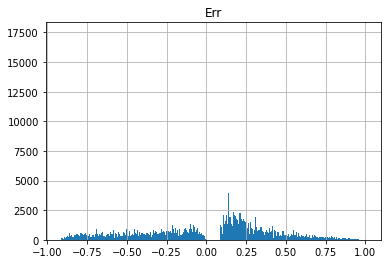

In [59]:

# fit the model on the whole dataset
model.fit(X_train, Y_train)

#Evaluate the prediction
#Predict
predictions = model.predict(X_test)


#Analise the prediction

#Merge two dataframes
result = X_test.copy()
result['Real'] = Y_test
result['Prediction'] =predictions


#Estimar error
result['Err'] = result['Real'] - result['Prediction']

print(result)

histogram = result.hist(column ='Err', bins=400)

In [60]:
#Merge two dataframes
result = X_test.copy()
result['Real'] = Y_test
result['Prediction'] =predictions.round(0)


#Estimar error
result['Err'] = result['Real'] - result['Prediction'] 

print(result)

#Calcular el error en funcion de real
result.groupby(by=['Real']).mean()[['Prediction']]


         hour  clusterId   Real  Prediction  Err
3518882     4         46  False         1.0 -1.0
5401758     3         69  False         1.0 -1.0
5775531     1         75   True         0.0  1.0
1921658    15         28   True         1.0  0.0
6252417    13         83  False         0.0  0.0
...       ...        ...    ...         ...  ...
783931     14       1130  False         0.0  0.0
2461379     8         36   True         1.0  0.0
466995      0         16  False         0.0  0.0
5628544     5         71   True         1.0  0.0
2089404     5         30   True         1.0  0.0

[242617 rows x 5 columns]


,Prediction
Real,
False,0.308961
True,0.812402
